**CSCI 183: Data Science**

**Final Project**

**Wallace Hwang, Aditya Ranade, Austin Wang, Travis Lee**

**Importing libraries used in this model** 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2021-2022_salary.csv to 2021-2022_salary (1).csv
Saving 2020-2021_salary.csv to 2020-2021_salary (1).csv
Saving 2019-2020_salary.csv to 2019-2020_salary (1).csv
Saving 2021-2022_stats.csv to 2021-2022_stats (1).csv
Saving 2020-2021_stats.csv to 2020-2021_stats (1).csv
Saving 2019-2020_stats.csv to 2019-2020_stats (1).csv


**Loading CSV files necessary for model and cleaning up unneeded instances**

In [ ]:
#Merge all the csvs
year1_stats = pd.read_csv('2019-2020_stats.csv', index_col = 0) #training set
year1_salary = pd.read_csv('2019-2020_salary.csv', index_col = 0) #Gets rid of unneeeded index column
year1_info = pd.merge(year1_stats, year1_salary, on = 'Player', how = 'left') #Join salary to players
year1_info = year1_info.dropna() #Get rid of NaN salaries

year2_stats = pd.read_csv('2020-2021_stats.csv', index_col = 0) #training set
year2_salary = pd.read_csv('2020-2021_salary.csv', index_col = 0) #Gets rid of unneeeded index column
year2_info = pd.merge(year2_stats, year2_salary, on = 'Player', how = 'left') #Join salary to players
year2_info = year2_info.dropna() #Get rid of NaN salaries

year3_stats = pd.read_csv('2021-2022_stats.csv', index_col = 0) #testing set
year3_salary = pd.read_csv('2021-2022_salary.csv', index_col = 0) #Gets rid of unneeeded index column
year3_info = pd.merge(year3_stats, year3_salary, on = 'Player', how = 'left') #Join salary to players
year3_info = year3_info.dropna() #Get rid of NaN salaries

**Year 1 Information:**

In [ ]:
year1_info

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,"$25,842,697"
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,"$3,454,080"
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,"$26,000,000"
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,"$2,964,840"
5,Grayson Allen,SG,24,MEM,38,0,18.9,3.1,6.6,0.466,...,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7,"$2,429,400"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,Justin Wright-Foreman,PG,22,UTA,4,0,11.3,1.8,5.0,0.350,...,0.0,1.3,1.3,1.8,0.5,0.0,0.8,1.3,4.8,"$79,568"
523,Thaddeus Young,PF,31,CHI,64,16,24.9,4.2,9.4,0.448,...,1.5,3.5,4.9,1.8,1.4,0.4,1.6,2.1,10.3,"$12,900,000"
524,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,"$6,273,000"
525,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,0.524,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,"$14,471,910"


**Year 2 Information:**

In [ ]:
year2_info

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,"$2,582,160"
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,0.614,...,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,"$29,592,695"
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,0.570,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,"$5,115,492"
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,0.473,...,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,"$17,628,340"
5,Ty-Shon Alexander,SG,22,PHO,15,0,3.1,0.2,0.8,0.250,...,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6,"$449,115"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Delon Wright,SG-PG,28,TOT,63,39,27.7,3.8,8.2,0.463,...,1.0,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2,"$9,000,000"
536,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,"$13,545,000"
537,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,"$6,571,800"
538,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,0.559,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,"$15,415,730"


**Year 3 Information:**

In [ ]:
year3_info

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,"$2,711,280"
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,"$17,073,171"
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,"$28,103,500"
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,"$2,641,691"
5,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,0.372,...,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,"$3,261,480"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Moses Wright,PF,23,TOT,4,0,3.5,0.3,1.0,0.250,...,0.3,0.5,0.8,0.5,0.0,0.3,0.0,0.0,1.3,"$172,821"
600,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,0.518,...,1.5,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,"$14,190,000"
601,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,"$8,326,471"
602,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,"$1,489,065"


**Initial model**

**Features chosen with the assumption that these attributes were best for Predicting salary**

In [ ]:
#Clean the data
useful_stats = ['Age','G','MP','FGA','FG%','3PA','3P%','2PA','2P%','FTA','FT%','TRB','AST','STL','BLK','PTS'] #Assumed best features from our own understanding
stats_1 = year1_info[useful_stats] #Set variable equal to dataframe only with required attributes
stats_2 = year2_info[useful_stats] #Set variable equal to dataframe only with required attributes
stats_3 = year3_info[useful_stats] #Set variable equal to dataframe only with required attributes

x = stats_1.append(stats_2).append(stats_3) 
# Inputs of training set and testing set of year_1, year_2, and year_3 useful stats combined

test_size_ratio = len(stats_3.index)/len(x.index) 
# Ratio of which data set will be used as testing set

salary_1 = year1_info['Salary'] #Set variable equal to data of target variable
salary_2 = year2_info['Salary'] #Set variable equal to data of target variable
salary_3 = year3_info['Salary'] #Set variable equal to data of target variable

y = salary_1.append(salary_2).append(salary_3) 
# Outputs of training set and testing set of year_1, year_2, and year_3 salaries combined

y = y.str[1:] # Get rid of dollar sign in front of all salaries so that we can convert salaries to float
y = y.str.replace(',', '') # Get rid of commas in salaries

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size_ratio, shuffle = False)
# With our test_size_ratio and specification that shuffe is 'False', we ensure that stats_3 and salary_3 are in our test set




In [ ]:
#Function to change a variable to float so that we can perform linear regression
#Also gets rid of first indexed character and removes commas
make_float = lambda x: float(x[1:].replace(',','')) 

#Create a dataframe of information of all years together
all_info = year1_info.append(year2_info).append(year3_info)
#Apply function so that our salaries are usable in linear regression (Strings not supported)
all_info['Salary'] = all_info['Salary'].apply(make_float)

**Information of all years together**

In [ ]:
all_info

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,25842697.0
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,3454080.0
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,26000000.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,2964840.0
5,Grayson Allen,SG,24,MEM,38,0,18.9,3.1,6.6,0.466,...,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7,2429400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Moses Wright,PF,23,TOT,4,0,3.5,0.3,1.0,0.250,...,0.3,0.5,0.8,0.5,0.0,0.3,0.0,0.0,1.3,172821.0
600,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,0.518,...,1.5,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,14190000.0
601,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,8326471.0
602,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,1489065.0


**Correlation of each variable to 'Salary'**

In [ ]:
all_info.corr()['Salary']

Age       0.403313
G         0.296024
GS        0.572729
MP        0.625788
FG        0.693492
FGA       0.686245
FG%       0.145855
3P        0.473993
3PA       0.481965
3P%       0.106283
2P        0.634592
2PA       0.645994
2P%       0.063536
eFG%      0.142452
FT        0.668325
FTA       0.659611
FT%       0.174445
ORB       0.243537
DRB       0.591799
TRB       0.529237
AST       0.630365
STL       0.495369
BLK       0.293308
TOV       0.659684
PF        0.380870
PTS       0.708797
Salary    1.000000
Name: Salary, dtype: float64

 *Highest 5 correlations:
PTS, FG, FGA, FT, TOV*

**Linear Regression of PTS vs Salary**

In [ ]:
X = all_info[['PTS']] #Independent variable
y = all_info['Salary'] #Dependent variable

lm = LinearRegression()
model = lm.fit(X, y) #Linear regression of provided variables

print(f'intercept = {model.intercept_}') #Theta0
print(f'coefficient = {model.coef_}') #Theta1

pred_y = model.predict(X) #Model prediction
print(pred_y.shape)
print(pred_y)

intercept = -2418827.9384149127
coefficient = [1041282.75386478]
(1284,)
[ 8931154.07871114 14137567.84803502 17261416.10962934 ...
 27153602.27134471  3099970.6570684   2995842.38168192]


**Prediction Model of Points vs Salary**

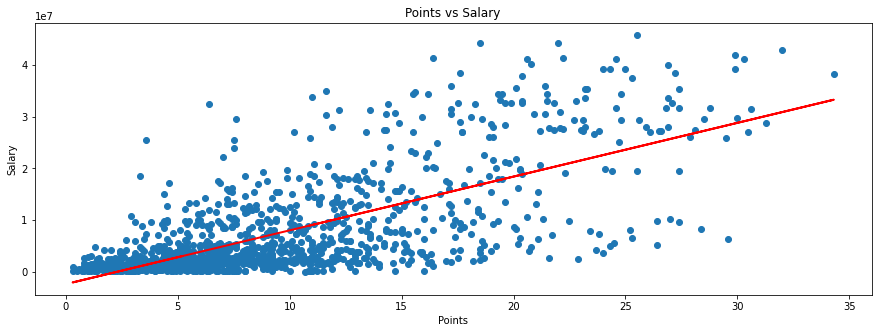

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(all_info['PTS'], all_info['Salary'], 'o')
plt.plot(all_info['PTS'], pred_y, 'r', linewidth=2)
plt.xlabel('Points')
plt.ylabel('Salary')
plt.title('Points vs Salary')

plt.show()

**Comparison of Actual vs Predicted values for Points vs Salary**

In [ ]:
comparison = pd.DataFrame({'Actual value': y, 'Predicted value': pred_y})
comparison

,Actual value,Predicted value
0,25842697.0,8.931154e+06
1,3454080.0,1.413757e+07
2,26000000.0,1.726142e+07
4,2964840.0,3.516484e+06
5,2429400.0,6.640332e+06
...,...,...
598,172821.0,-1.065160e+06
600,14190000.0,4.037125e+06
601,8326471.0,2.715360e+07
602,1489065.0,3.099971e+06


**Error of Points vs Salary Model**

In [ ]:
meanAbErr = metrics.mean_absolute_error(y, pred_y)
meanSqErr = metrics.mean_squared_error(y, pred_y)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

Mean Absolute Error: 4621029.827787768
Mean Square Error: 43928405529040.74


In [ ]:
X = all_info[['FG']] #Independent variable
y = all_info['Salary'] #Dependent variable

lm = LinearRegression()
model = lm.fit(X, y) #Linear regression of provided variables

print(f'intercept = {model.intercept_}') #Theta0
print(f'coefficient = {model.coef_}') #Theta1

pred_y = model.predict(X) #y^
print(pred_y.shape)
print(pred_y)

intercept = -2409484.418941846
coefficient = [2839919.49391244]
(1284,)
[10370153.30366411 14914024.49392401 18605919.83601017 ...
 24285758.82383505  4122330.41705675  2986362.61949178]


**Prediction Model of Field Goals vs Salary**

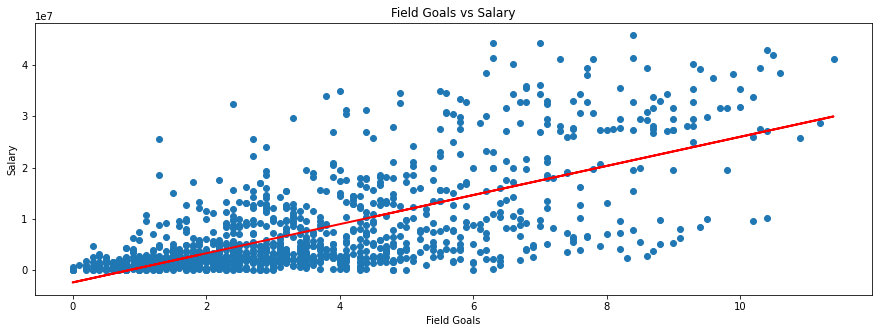

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(all_info['FG'], all_info['Salary'], 'o')
plt.plot(all_info['FG'], pred_y, 'r', linewidth=2)
plt.xlabel('Field Goals')
plt.ylabel('Salary')
plt.title('Field Goals vs Salary')

plt.show()

**Comparison of Actual vs Predicted values for Field Goals vs Salary**

In [ ]:
comparison = pd.DataFrame({'Actual value': y, 'Predicted value': pred_y})
comparison

,Actual value,Predicted value
0,25842697.0,1.037015e+07
1,3454080.0,1.491402e+07
2,26000000.0,1.860592e+07
4,2964840.0,3.554347e+06
5,2429400.0,6.394266e+06
...,...,...
598,172821.0,-1.557509e+06
600,14190000.0,5.258298e+06
601,8326471.0,2.428576e+07
602,1489065.0,4.122330e+06


**Error of Field Goal vs Salary Model**

In [ ]:
meanAbErr = metrics.mean_absolute_error(y, pred_y)
meanSqErr = metrics.mean_squared_error(y, pred_y)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

Mean Absolute Error: 4750522.964445478
Mean Square Error: 45823005451608.91


**Linear Regression of Field Goals Attempted vs Salary**

In [ ]:
X = all_info[['FGA']] #Independepent variable
y = all_info['Salary'] #Dependepent variable

lm = LinearRegression()
model = lm.fit(X, y) #Linear regression of FGA vs Salary

print(f'intercept = {model.intercept_}') #Theta 0
print(f'coefficient = {model.coef_}') #Theta 1

pred_y = model.predict(X) #y^
print(pred_y.shape)
print(pred_y)

intercept = -2800331.788606452
coefficient = [1344543.75824806]
(1284,)
[ 7418200.7740788  11989649.55212221 17367824.58511444 ...
 24493906.50382917  3115660.74768501  1636662.61361215]


**Prediction Model of Field Goals Attempted vs Salary**

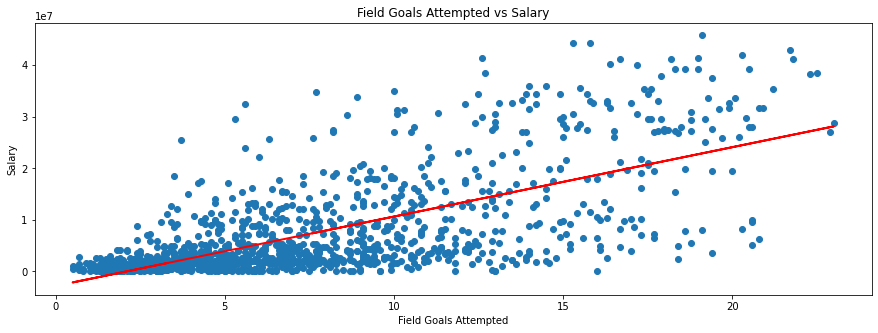

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(all_info['FGA'], all_info['Salary'], 'o')
plt.plot(all_info['FGA'], pred_y, 'r', linewidth=2)
plt.xlabel('Field Goals Attempted')
plt.ylabel('Salary')
plt.title('Field Goals Attempted vs Salary')

plt.show()

**Comparison of Actaul vs Predicted values for Field Goals Attempted vs Salary**

In [ ]:
comparison = pd.DataFrame({'Actual value': y, 'Predicted value': pred_y})
comparison

,Actual value,Predicted value
0,25842697.0,7.418201e+06
1,3454080.0,1.198965e+07
2,26000000.0,1.736782e+07
4,2964840.0,4.863568e+06
5,2429400.0,6.073657e+06
...,...,...
598,172821.0,-1.455788e+06
600,14190000.0,4.191296e+06
601,8326471.0,2.449391e+07
602,1489065.0,3.115661e+06


**Error of Field Goals Attempted vs Salary Model**

In [ ]:
meanAbErr = metrics.mean_absolute_error(y, pred_y)
meanSqErr = metrics.mean_squared_error(y, pred_y)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

Mean Absolute Error: 4783786.829772196
Mean Square Error: 46705698422249.4


**Linear Regression of Free Throws vs Salary**

In [ ]:
X = all_info[['FT']] #Independent Variable
y = all_info['Salary'] #Dependeent Variable

lm = LinearRegression()
model = lm.fit(X, y) #Linear regression of FT vs Salary

print(f'intercept = {model.intercept_}') #Theta0
print(f'coefficient = {model.coef_}') #Theta1

pred_y = model.predict(X) #y^
print(pred_y.shape) 
print(pred_y)

intercept = 812971.0949741574
coefficient = [4473583.35591344]
(1284,)
[ 9312779.47120968 17365229.51185387 14233721.16271446 ...
 30338621.24400283  3944479.44411356  7075987.79325297]


**Prediction Model for Free Throws vs Salary**

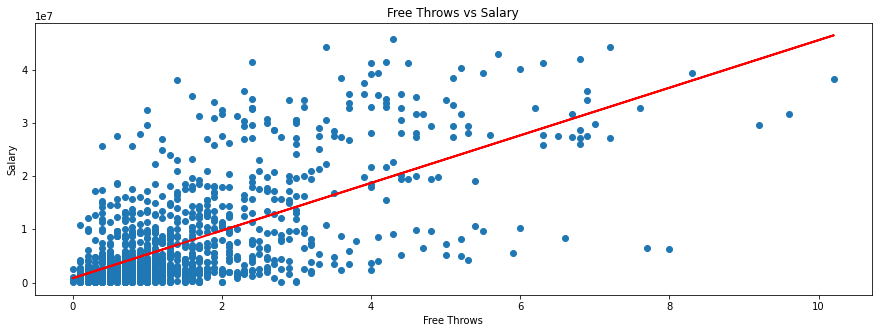

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(all_info['FT'], all_info['Salary'], 'o')
plt.plot(all_info['FT'], pred_y, 'r', linewidth=2)
plt.xlabel('Free Throws')
plt.ylabel('Salary')
plt.title('Free Throws vs Salary')

plt.show()

**Comparison of Actaul vs Predicted values for Free Throws vs Salary**

In [ ]:
comparison = pd.DataFrame({'Actual value': y, 'Predicted value': pred_y})
comparison

,Actual value,Predicted value
0,25842697.0,9.312779e+06
1,3454080.0,1.736523e+07
2,26000000.0,1.423372e+07
4,2964840.0,3.049763e+06
5,2429400.0,5.286554e+06
...,...,...
598,172821.0,4.391838e+06
600,14190000.0,2.602404e+06
601,8326471.0,3.033862e+07
602,1489065.0,3.944479e+06


**Error of Free Throws vs Salary Model**

In [ ]:
meanAbErr = metrics.mean_absolute_error(y, pred_y)
meanSqErr = metrics.mean_squared_error(y, pred_y)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

Mean Absolute Error: 4806195.702023781
Mean Square Error: 48848672849281.69


**Linear Regression of Turnovers vs Salary**

In [ ]:
X = all_info[['TOV']] #Independent variable
y = all_info['Salary'] #Dependent variable

lm = LinearRegression()
model = lm.fit(X, y) #Linear regression of Turnovers vs Salary

print(f'intercept = {model.intercept_}') #Theta0
print(f'coefficient = {model.coef_}') #Theta1

pred_y = model.predict(X) #y^
print(pred_y.shape)
print(pred_y)

intercept = -1267520.8322402462
coefficient = [7451041.69878545]
(1284,)
[ 9909041.71593793 19595395.92435902  9163937.54605938 ...
 28536645.96290156  3948208.35690957  3948208.35690957]


**Prediction Model for Turnovers vs Salary**

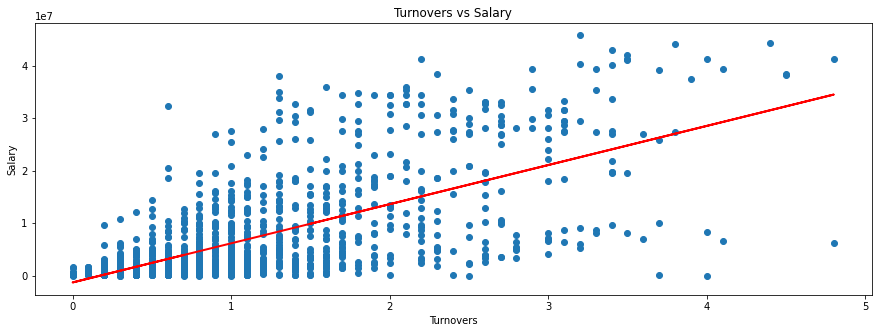

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(all_info['TOV'], all_info['Salary'], 'o')
plt.plot(all_info['TOV'], pred_y, 'r', linewidth=2)
plt.xlabel('Turnovers')
plt.ylabel('Salary')
plt.title('Turnovers vs Salary')

plt.show()

**Comparison for Actual vs Predicted values on Turnovers vs Salary**

In [ ]:
comparison = pd.DataFrame({'Actual value': y, 'Predicted value': pred_y})
comparison

,Actual value,Predicted value
0,25842697.0,9.909042e+06
1,3454080.0,1.959540e+07
2,26000000.0,9.163938e+06
4,2964840.0,6.928625e+06
5,2429400.0,5.438417e+06
...,...,...
598,172821.0,-1.267521e+06
600,14190000.0,6.183521e+06
601,8326471.0,2.853665e+07
602,1489065.0,3.948208e+06


Models for Some Other Variables

In [ ]:
predictors = ['FTA']
X = all_info[predictors]
y = all_info['Salary']

lm = LinearRegression()
model = lm.fit(X, y)

print(f'intercept = {model.intercept_}')
print(f'coefficient = {model.coef_}')

pred_y = model.predict(X)
print(pred_y.shape)
print(pred_y)

intercept = 531038.1844526893
coefficient = [3618113.65871598]
(1284,)
[12109001.89234381 19707040.57564736 13556247.3558302  ...
 26943267.89307931  4510963.20904026  7043642.77014145]


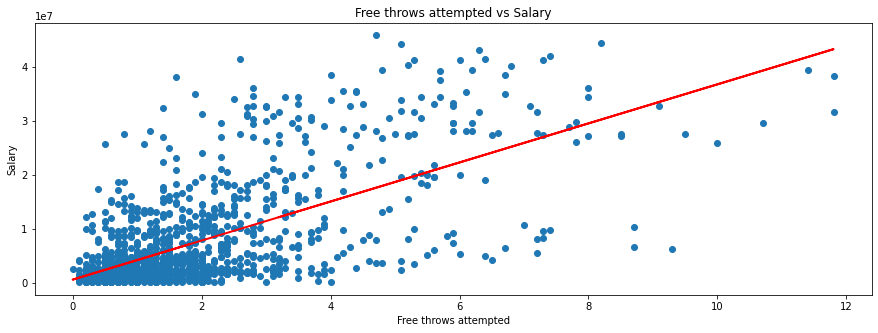

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(all_info['FTA'], all_info['Salary'], 'o')
plt.plot(all_info['FTA'], pred_y, 'r', linewidth=2)
plt.xlabel('Free throws attempted')
plt.ylabel('Salary')
plt.title('Free throws attempted vs Salary')

plt.show()

In [ ]:
predictors = ['2PA']
X = all_info[predictors]
y = all_info['Salary']

lm = LinearRegression()
model = lm.fit(X, y)

print(f'intercept = {model.intercept_}')
print(f'coefficient = {model.coef_}')

pred_y = model.predict(X)
print(pred_y.shape)
print(pred_y)

intercept = -727014.4585018987
coefficient = [1769836.40514978]
(1284,)
[12546758.58012145 18387218.71711573 20511022.40329546 ...
 21041973.3248404   6706298.44312718  4936462.0379774 ]


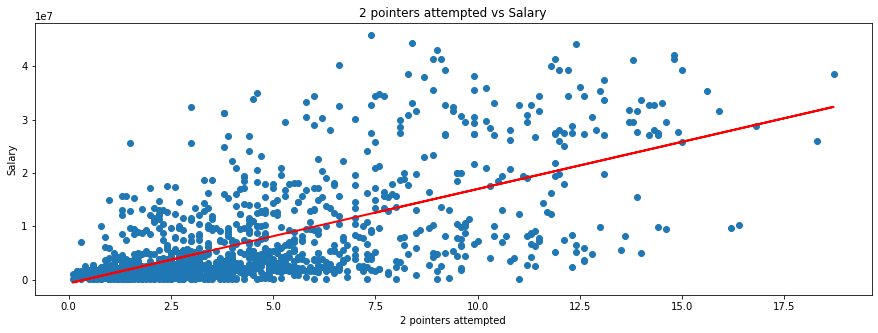

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(all_info['2PA'], all_info['Salary'], 'o')
plt.plot(all_info['2PA'], pred_y, 'r', linewidth=2)
plt.xlabel('2 pointers attempted')
plt.ylabel('Salary')
plt.title('2 pointers attempted vs Salary')

plt.show()

In [ ]:
predictors = ['2P']
X = all_info[predictors]
y = all_info['Salary']

lm = LinearRegression()
model = lm.fit(X, y)

print(f'intercept = {model.intercept_}')
print(f'coefficient = {model.coef_}')

pred_y = model.predict(X)
print(pred_y.shape)
print(pred_y)

intercept = -305805.56122890767
coefficient = [3207286.20587665]
(1284,)
[14126982.365216   19258640.29461863 19579368.9152063  ...
 19900097.53579396  7070952.71228738  5788038.22993672]


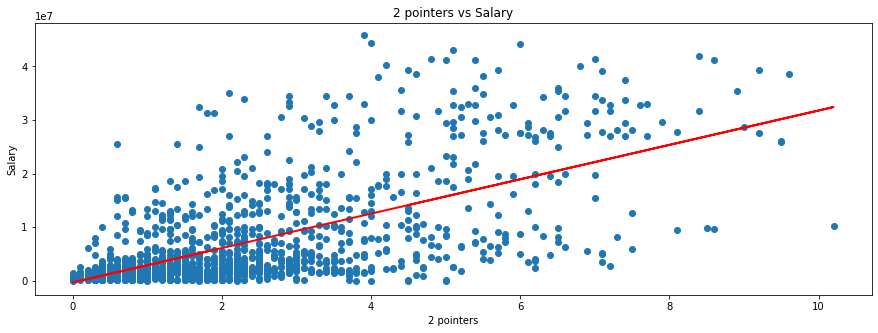

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(all_info['2P'], all_info['Salary'], 'o')
plt.plot(all_info['2P'], pred_y, 'r', linewidth=2)
plt.xlabel('2 pointers')
plt.ylabel('Salary')
plt.title('2 pointers vs Salary')

plt.show()

In [ ]:
predictors = ['MP']
X = all_info[predictors]
y = all_info['Salary']

lm = LinearRegression()
model = lm.fit(X, y)

print(f'intercept = {model.intercept_}')
print(f'coefficient = {model.coef_}')

pred_y = model.predict(X)
print(pred_y.shape)
print(pred_y)

intercept = -6242167.908924881
coefficient = [655170.98940447]
(1284,)
[11250897.50817434 15771577.33506516 15443991.84036293 ...
 16623299.62129096  2012986.55757138  2340572.05227362]


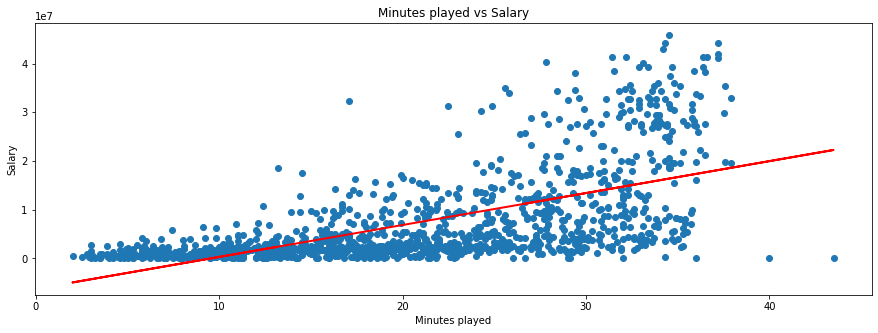

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(all_info['MP'], all_info['Salary'], 'o')
plt.plot(all_info['MP'], pred_y, 'r', linewidth=2)
plt.xlabel('Minutes played')
plt.ylabel('Salary')
plt.title('Minutes played vs Salary')

plt.show()

In [ ]:
predictors = ['AST']
X = all_info[predictors]
y = all_info['Salary']

lm = LinearRegression()
model = lm.fit(X, y)

print(f'intercept = {model.intercept_}')
print(f'coefficient = {model.coef_}')

pred_y = model.predict(X)
print(pred_y.shape)
print(pred_y)

intercept = 597669.6630121265
coefficient = [3189820.15885734]
(1284,)
[ 7934256.02838402 16865752.47318459  8253238.04426975 ...
 31538925.20392837  3468507.80598374  3149525.790098  ]


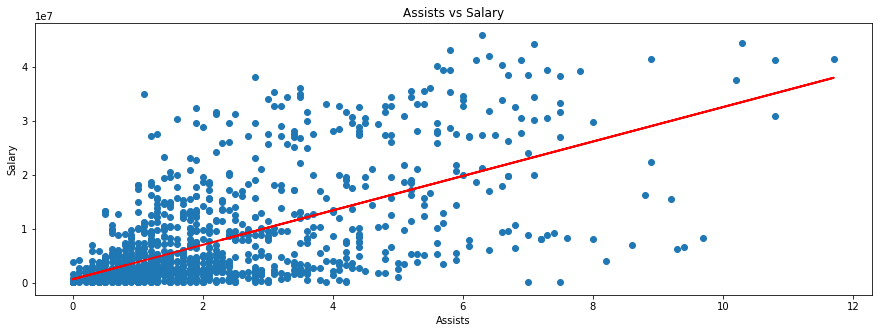

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(all_info['AST'], all_info['Salary'], 'o')
plt.plot(all_info['AST'], pred_y, 'r', linewidth=2)
plt.xlabel('Assists')
plt.ylabel('Salary')
plt.title('Assists vs Salary')

plt.show()

In [ ]:
meanAbErr = metrics.mean_absolute_error(y, pred_y)
meanSqErr = metrics.mean_squared_error(y, pred_y)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

Mean Absolute Error: 5037325.713721599
Mean Square Error: 53200645552312.14


**Multivariate Linear Regression with 5 Highest Correlating Variables**

In [ ]:
predictors = ['PTS', 'FG', 'FGA', 'FT', 'TOV'] #Features being used to predict salary
X = all_info[predictors] #Set X to dataframe of these specific features
y = all_info['Salary'] #Set Y to 'Salary' data 

lm = LinearRegression()
model = lm.fit(X, y) #Linear regression of specified predictors vs Salary

pred_y = model.predict(X) #y^

comparison = pd.DataFrame({'Actual value': y, 'Predicted value': pred_y}) #Comparison of our predicted Y values vs Actual Y values (Y^ vs Y)
comparison

,Actual value,Predicted value
0,25842697.0,9.264982e+06
1,3454080.0,1.688415e+07
2,26000000.0,1.417374e+07
4,2964840.0,3.930911e+06
5,2429400.0,6.480932e+06
...,...,...
598,172821.0,-8.570180e+05
600,14190000.0,3.918095e+06
601,8326471.0,3.099340e+07
602,1489065.0,2.759701e+06


**Error for {'PTS', 'FG', 'FGA', 'FT', 'TOV'} vs 'Salary'**




In [ ]:
meanAbErr = metrics.mean_absolute_error(y, pred_y)
meanSqErr = metrics.mean_squared_error(y, pred_y)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

Mean Absolute Error: 4507209.247131441
Mean Square Error: 42265091519745.8


**Intercept and Coefficients for Hypothesis Function**

In [ ]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  -2158086.247566011
Coefficients:


[('PTS', 1578649.6478291133),
 ('FG', -1322086.1018171408),
 ('FGA', -522761.7241906703),
 ('FT', 210264.0590319276),
 ('TOV', 2492441.0513005797)]

**No turnovers since it wouldn't make sense based on understanding of the game. However, stats with over .6 correlation score are included since turnovers should be a bad measure.**

In [ ]:
#Multivariate linear regression with 10 highest corr variables (no turnovers)
predictors = ['PTS', 'FG', 'FGA', 'FT', 'FTA', '2PA', '2P', 'MP', 'AST']
X = all_info[predictors] #Set X to dataframe of these specific features
y = all_info['Salary'] #Set Y to 'Salary' data 

lm = LinearRegression()
model = lm.fit(X, y) #Linear regression of specified predictors vs Salary

pred_y = model.predict(X) #y^

comparison = pd.DataFrame({'Actual value': y, 'Predicted value': pred_y}) #Comparison of our predicted Y values vs Actual Y values (Y^ vs Y)
comparison

,Actual value,Predicted value
0,25842697.0,9.741645e+06
1,3454080.0,1.781484e+07
2,26000000.0,1.359444e+07
4,2964840.0,3.559071e+06
5,2429400.0,6.023342e+06
...,...,...
598,172821.0,-4.842486e+05
600,14190000.0,4.566228e+06
601,8326471.0,3.295242e+07
602,1489065.0,2.453029e+06


**Error for {'PTS', 'FG', 'FGA', 'FT', 'FTA', '2PA', '2P', 'MP', 'AST'} vs 'Salary'**





In [ ]:
meanAbErr = metrics.mean_absolute_error(y, pred_y)
meanSqErr = metrics.mean_squared_error(y, pred_y)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

Mean Absolute Error: 4444666.059727842
Mean Square Error: 40675826105362.26


**Intercept and Coefficients for Hypothesis Function**

In [ ]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  -2241751.26966572
Coefficients:


[('PTS', 2831052.6808110727),
 ('FG', -5369346.695504102),
 ('FGA', -492016.01055842824),
 ('FT', -1927228.1458506198),
 ('FTA', 810579.1857891668),
 ('2PA', -307042.3758407396),
 ('2P', 1957288.2011341886),
 ('MP', 21065.01337166503),
 ('AST', 1315986.5282734726)]

**Trying out model with salaries between 6 million and 25 million to remove outlier players**

In [ ]:
all_info_new = all_info[(all_info.Salary > 6000000) & (all_info.Salary < 25000000)]

In [ ]:
all_info_new

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
8,Al-Farouq Aminu,PF,29,ORL,18,2,21.1,1.4,4.8,0.291,...,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3,9258000.0
10,Kyle Anderson,SF,26,MEM,67,28,19.9,2.3,4.9,0.474,...,0.9,3.4,4.3,2.4,0.8,0.6,1.0,1.7,5.8,9073050.0
18,Trevor Ariza,SF,34,TOT,53,21,28.2,2.7,6.1,0.438,...,0.6,4.0,4.6,1.7,1.3,0.3,1.1,2.1,8.0,12200000.0
20,Deandre Ayton,C,21,PHO,38,32,32.5,8.2,14.9,0.546,...,3.9,7.6,11.5,1.9,0.7,1.5,2.1,3.1,18.2,9562920.0
23,Lonzo Ball,PG,22,NOP,63,54,32.1,4.4,10.9,0.403,...,1.1,5.0,6.1,7.0,1.4,0.6,3.1,2.0,11.8,8719320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,Patrick Williams,PF,20,CHI,17,9,24.8,3.2,6.0,0.529,...,1.0,3.1,4.1,0.9,0.5,0.5,0.9,1.6,9.0,7422000.0
594,Christian Wood,C,26,HOU,68,67,30.8,6.5,12.9,0.501,...,1.6,8.5,10.1,2.3,0.8,1.0,1.9,2.5,17.9,13666667.0
596,Delon Wright,SG,29,ATL,77,8,18.9,1.6,3.5,0.454,...,0.6,2.2,2.9,2.4,1.2,0.2,0.6,0.7,4.4,8526316.0
600,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,0.518,...,1.5,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,14190000.0


**Multivariate Linear Regression with 5 Highest Correlating Variables (With Salary Constraint)**

In [ ]:
predictors = ['PTS', 'FG', 'FGA', 'FT', 'TOV']
X = all_info_new[predictors] #Set X to dataframe of these specific features
y = all_info_new['Salary'] #Set Y to 'Salary' data 

lm = LinearRegression()
model = lm.fit(X, y) #Linear regression of specified predictors vs Salary

pred_y = model.predict(X) #y^

comparison = pd.DataFrame({'Actual value': y, 'Predicted value': pred_y}) #Comparison of our predicted Y values vs Actual Y values (Y^ vs Y)
comparison

,Actual value,Predicted value
8,9258000.0,1.103343e+07
10,9073050.0,1.077601e+07
18,12200000.0,1.188222e+07
20,9562920.0,1.114368e+07
23,8719320.0,1.317583e+07
...,...,...
587,7422000.0,1.134457e+07
594,13666667.0,1.313654e+07
596,8526316.0,1.072296e+07
600,14190000.0,1.063935e+07


**Error for {'PTS', 'FG', 'FGA', 'FT', 'TOV'} vs 'Salary' (With Salary Cap)**


In [ ]:
meanAbErr = metrics.mean_absolute_error(y, pred_y)
meanSqErr = metrics.mean_squared_error(y, pred_y)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

Mean Absolute Error: 3603197.715044754
Mean Square Error: 19217224663874.113


*Mean absolute error went down about 1 million when Salary constraints to remove outliers were made*

**Intercept and Coefficients for Hypothesis Function**

In [ ]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  9818199.788246553
Coefficients:


[('PTS', 882827.9139905305),
 ('FG', -2000685.2150654392),
 ('FGA', 177640.9441547594),
 ('FT', -642984.7980569535),
 ('TOV', 82928.5850706227)]

In [ ]:
predictors = ['PTS', 'FG', 'FGA', 'FT', 'FTA', '2PA', '2P', 'MP', 'AST'] 
X = all_info_new[predictors] #Set X to dataframe of these specific features
y = all_info_new['Salary'] #Set Y to 'Salary' data 

lm = LinearRegression()
model = lm.fit(X, y) #Linear regression of specified predictors vs Salary

pred_y = model.predict(X) #y^

comparison = pd.DataFrame({'Actual value': y, 'Predicted value': pred_y}) #Comparison of our predicted Y values vs Actual Y values (Y^ vs Y)
comparison

,Actual value,Predicted value
8,9258000.0,1.137609e+07
10,9073050.0,1.099674e+07
18,12200000.0,1.303667e+07
20,9562920.0,1.150336e+07
23,8719320.0,1.338071e+07
...,...,...
587,7422000.0,1.184368e+07
594,13666667.0,1.267666e+07
596,8526316.0,1.040136e+07
600,14190000.0,9.721602e+06


**Error for {'PTS', 'FG', 'FGA', 'FT', 'FTA', '2PA', '2P', 'MP', 'AST'} vs 'Salary' (With Salary Cap)**


In [ ]:
meanAbErr = metrics.mean_absolute_error(y, pred_y)
meanSqErr = metrics.mean_squared_error(y, pred_y)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

Mean Absolute Error: 3552173.3745546606
Mean Square Error: 18317821109558.156


**Intercept and Coefficients for Hypothesis Function**

In [ ]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  5967047.153327018
Coefficients:


[('PTS', 3735352.95553833),
 ('FG', -11253081.786891654),
 ('FGA', 27361.186071593314),
 ('FT', -3301934.9492468415),
 ('FTA', -127750.20681665791),
 ('2PA', 136036.51717200596),
 ('2P', 3082855.832418477),
 ('MP', 271912.4854335785),
 ('AST', -71913.13384342496)]